In [3]:
import numpy as np
import pandas as pd
import psycopg2
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neural_network import MLPRegressor
from config import db_password

## fetch from Postgres

In [4]:
#establishing the connection
conn = psycopg2.connect(
   database="playlist_db", user='postgres', password=db_password, host='127.0.0.1', port= '5433'
)

In [5]:
#Setting auto commit false
conn.autocommit = True

#Creating a cursor object using the cursor() method
cursor = conn.cursor()

In [ ]:
# #Retrieving DUPLICATE data
# cursor.execute('''
# SELECT f.danceability, f.energy, f.key, f.loudness, f.mode, f.speechiness, f.acousticness, f.instrumentalness, f.liveness, f.valence, f.tempo, f.duration_ms, f.time_signature, p.popularity
# FROM features AS f
# LEFT JOIN playlists AS p
# ON f.uri = p.track_uri;
# ''')

In [6]:
#Retrieving DISTINCT data
cursor.execute('''
SELECT DISTINCT f.danceability, f.energy, f.key, f.loudness, f.mode, f.speechiness, f.acousticness, f.instrumentalness, f.liveness, f.valence, f.tempo, f.duration_ms, f.time_signature, p.popularity
FROM features AS f
JOIN playlists AS p
ON f.uri = p.track_uri;
''')

In [30]:
# #Retrieving DISTINCT data
# cursor.execute('''
# SELECT DISTINCT nf.danceability, nf.energy, nf.key, nf.loudness, nf.mode, nf.speechiness, nf.acousticness, nf.instrumentalness, nf.liveness, nf.valence, nf.tempo, nf.duration_ms, nf.time_signature, np.popularity
# FROM new_features AS nf
# JOIN new_playlists AS np
# ON nf.uri = np.track_uri;
# ''')

In [ ]:
# #Retrieving ALL data
# cursor.execute('''
# SELECT *
# FROM features AS f
# JOIN playlists AS p
# ON f.uri = p.track_uri;
# ''')

In [7]:
#Fetching all rows from the table
result = cursor.fetchall();
print(result)

[(0.623, 0.798, 6, -8.704, 0, 0.0814, 0.331, 0.915, 0.192, 0.196, 130.009, 225231, 4, 1), (0.784, 0.81, 9, -9.237, 0, 0.0445, 0.316, 0.916, 0.0793, 0.648, 140.027, 194359, 4, 24), (0.733, 0.668, 1, -6.269, 1, 0.0296, 0.0264, 0.235, 0.206, 0.74, 116.527, 273653, 4, 24), (0.695, 0.769, 6, -5.532, 0, 0.05, 0.0462, 4.5e-05, 0.0814, 0.761, 115.936, 185564, 4, 56), (0.444, 0.729, 2, -5.442, 0, 0.0281, 0.00695, 1.8e-06, 0.0703, 0.388, 95.258, 303593, 4, 52), (0.718, 0.87, 2, -6.227, 1, 0.0447, 0.000178, 0.234, 0.0869, 0.129, 118.937, 124034, 4, 71), (0.771, 0.0995, 0, -11.712, 0, 0.104, 0.896, 0.355, 0.112, 0.397, 122.909, 119090, 4, 59), (0.724, 0.331, 2, -12.221, 0, 0.0667, 0.741, 0.774, 0.113, 0.28, 79.955, 167771, 4, 52), (0.546, 0.798, 11, -4.812, 1, 0.0354, 0.00729, 0.0368, 0.111, 0.233, 123.001, 290302, 4, 55), (0.216, 0.0575, 7, -25.96, 0, 0.0501, 0.994, 0.951, 0.109, 0.151, 206.686, 118500, 4, 66), (0.49, 0.533, 10, -8.237, 0, 0.0339, 0.0151, 0.428, 0.103, 0.233, 89.993, 306846, 4, 2

In [8]:
machine_learning_df = pd.DataFrame(result)

In [9]:
machine_learning_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6803 entries, 0 to 6802
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       6803 non-null   float64
 1   1       6803 non-null   float64
 2   2       6803 non-null   int64  
 3   3       6803 non-null   float64
 4   4       6803 non-null   int64  
 5   5       6803 non-null   float64
 6   6       6803 non-null   float64
 7   7       6803 non-null   float64
 8   8       6803 non-null   float64
 9   9       6803 non-null   float64
 10  10      6803 non-null   float64
 11  11      6803 non-null   int64  
 12  12      6803 non-null   int64  
 13  13      6803 non-null   int64  
dtypes: float64(9), int64(5)
memory usage: 744.2 KB


In [10]:
#Commit your changes in the database
# conn.commit()

#Closing the connection
conn.close()

In [11]:
# this is main machine learning layout
machine_learning_df = machine_learning_df.rename(columns=
                                 {
                                  0: 'danceability',
                                  1: 'energy',
                                  2: 'key',
                                  3: 'loudness',
                                  4: 'mode',
                                  5: 'speechiness',
                                  6: 'acousticness',
                                  7: 'instrumentalness',
                                  8: 'liveness',
                                  9: 'valence',
                                  10: 'tempo',
                                  11: 'duration_ms',
                                  12: 'time_signature',
                                  13: 'popularity'
                                  })                  

In [ ]:
# # this layout is for a full join
# machine_learning_df = machine_learning_df.rename(columns=
#                                  {
#                                   0: 'danceability',
#                                   1: 'energy',
#                                   2: 'key',
#                                   3: 'loudness',
#                                   4: 'mode',
#                                   5: 'speechiness',
#                                   6: 'acousticness',
#                                   7: 'instrumentalness',
#                                   8: 'liveness',
#                                   9: 'valence',
#                                   10: 'tempo',
#                                   11: 'type',
#                                   12: 'id',
#                                   13: 'uri',
#                                   14: 'track_href',
#                                   15: 'analysis_url',
#                                   16: 'duration_ms',
#                                   17: 'time_signature',
#                                   18: 'playlist_name',
#                                   19: 'followers',
#                                   20: 'songs',
#                                   21: 'genre_1',
#                                   22: 'genre_2',
#                                   23: 'playlist_uri',
#                                   24: 'track_uri',
#                                   25: 'popularity',
#                                   26: 'artist_name',
#                                   27: 'song_name'
#                                  })                  

In [12]:
machine_learning_df = machine_learning_df.drop_duplicates()

In [14]:
ml_matrix = machine_learning_df.corr(method='pearson')

ml_matrix

danceability    energy       key  loudness      mode  \
danceability          1.000000  0.192690  0.032593  0.456172 -0.105554   
energy                0.192690  1.000000  0.054164  0.748106 -0.073767   
key                   0.032593  0.054164  1.000000  0.044263 -0.158775   
loudness              0.456172  0.748106  0.044263  1.000000 -0.060172   
mode                 -0.105554 -0.073767 -0.158775 -0.060172  1.000000   
speechiness           0.203185  0.126200  0.004353  0.148785 -0.056862   
acousticness         -0.251484 -0.781359 -0.033388 -0.676595  0.050896   
instrumentalness     -0.280804 -0.349642 -0.002610 -0.620092 -0.041473   
liveness             -0.149290  0.258017  0.002699  0.054523 -0.013609   
valence               0.526934  0.334780  0.047860  0.395941 -0.049314   
tempo                -0.085915  0.209989  0.011648  0.206280  0.026073   
duration_ms          -0.126097  0.054350  0.002723  0.060396 -0.020971   
time_signature        0.223542  0.208064  0.019707  0.260138 -0.034139   
popularity            0.157693  0.078087  0.008191  0.106112 -0.002313   

                  speechiness  acousticness  instrumentalness  liveness  \
danceability         0.203185     -0.251484         -0.280804 -0.149290   
energy               0.126200     -0.781359         -0.349642  0.258017   
key                  0.004353     -0.033388         -0.002610  0.002699   
loudness             0.148785     -0.676595         -0.620092  0.054523   
mode                -0.056862      0.050896         -0.041473 -0.013609   
speechiness          1.000000     -0.119189         -0.166455  0.049801   
acousticness        -0.119189      1.000000          0.382633 -0.161850   
instrumentalness    -0.166455      0.382633          1.000000 -0.011101   
liveness             0.049801     -0.161850         -0.011101  1.000000   
valence              0.076584     -0.276502         -0.260612 -0.056720   
tempo                0.092286     -0.190820         -0.141339  0.013093   
duration_ms         -0.129864     -0.061312          0.022850 -0.052617   
time_signature       0.057133     -0.204232         -0.163707 -0.018696   
popularity           0.112220     -0.088224         -0.212194  0.018472   

                   valence     tempo  duration_ms  time_signature  popularity  
danceability      0.526934 -0.085915    -0.126097        0.223542    0.157693  
energy            0.334780  0.209989     0.054350        0.208064    0.078087  
key               0.047860  0.011648     0.002723        0.019707    0.008191  
loudness          0.395941  0.206280     0.060396        0.260138    0.106112  
mode             -0.049314  0.026073    -0.020971       -0.034139   -0.002313  
speechiness       0.076584  0.092286    -0.129864        0.057133    0.112220  
acousticness     -0.276502 -0.190820    -0.061312       -0.204232   -0.088224  
instrumentalness -0.260612 -0.141339     0.022850       -0.163707   -0.212194  
liveness         -0.056720  0.013093    -0.052617       -0.018696    0.018472  
valence           1.000000  0.073243    -0.090746        0.159419    0.055255  
tempo             0.073243  1.000000     0.011091       -0.009138    0.001557  
duration_ms      -0.090746  0.011091     1.000000        0.021350   -0.171604  
time_signature    0.159419 -0.009138     0.021350        1.000000    0.024073  
popularity        0.055255  0.001557    -0.171604        0.024073    1.000000

## Correlations
the top 5 features most closely related to popularity (along with the top 5 features most closely correlated with each of those features) are:
- danceability 0.157693
    - valence             0.526934
    - loudness            0.456172
    - time_signature      0.223542
    - speechiness         0.203185
    - energy 0.192690
- speechiness 0.112220
    - danceability        0.203185
    - loudness            0.148785
    - energy              0.126200
    - popularity          0.112220
    - tempo               0.092286
- loudness 0.106112
    - energy              0.748106
    - danceability        0.456172
    - valence             0.395941
    - time_signature      0.260138
    - tempo               0.206280
- energy 0.078087
    - loudness            0.748106
    - valence             0.334780
    - liveness            0.258017
    - tempo               0.209989
    - time_signature      0.208064
- valence 0.055255
    - danceability        0.526934
    - loudness            0.395941
    - energy              0.334780
    - time_signature      0.159419
    - speechiness         0.076584

energy: 5<br>
loudness: 5<br>
danceability: 4<br>
valence: 4<br>
time_signature: 4<br>
speechiness: 3<br>
tempo: 3<br>

In [15]:
ml_matrix['popularity'].sort_values(ascending=False)

popularity          1.000000
danceability        0.157693
speechiness         0.112220
loudness            0.106112
energy              0.078087
valence             0.055255
time_signature      0.024073
liveness            0.018472
key                 0.008191
tempo               0.001557
mode               -0.002313
acousticness       -0.088224
duration_ms        -0.171604
instrumentalness   -0.212194
Name: popularity, dtype: float64

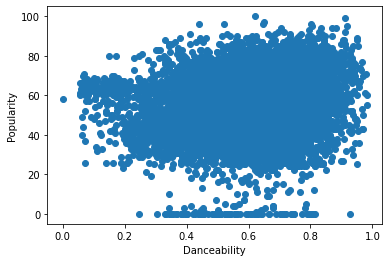

In [16]:
plt.scatter(machine_learning_df.danceability, machine_learning_df.popularity)
plt.xlabel('Danceability')
plt.ylabel('Popularity')
plt.show()

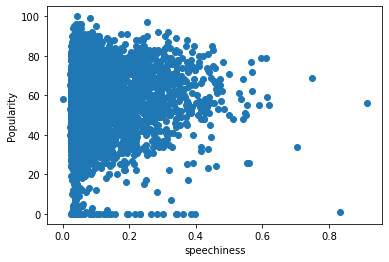

In [18]:
plt.scatter(machine_learning_df.speechiness, machine_learning_df.popularity)
plt.xlabel('Speechiness')
plt.ylabel('Popularity')
plt.show()

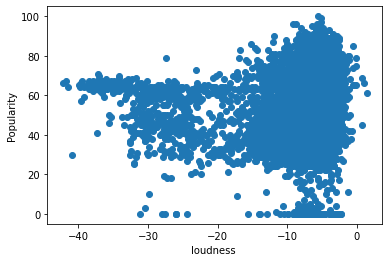

In [19]:
plt.scatter(machine_learning_df.loudness, machine_learning_df.popularity)
plt.xlabel('Loudness ')
plt.ylabel('Popularity')
plt.show()

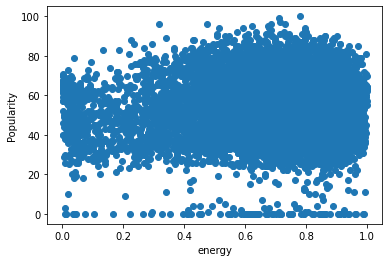

In [20]:
plt.scatter(machine_learning_df.energy, machine_learning_df.popularity)
plt.xlabel('Energy')
plt.ylabel('Popularity')
plt.show()

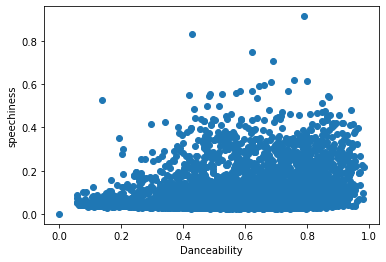

In [22]:
plt.scatter(machine_learning_df.danceability, machine_learning_df.speechiness)
plt.xlabel('Danceability')
plt.ylabel('Speechiness')
plt.show()

In [23]:
ml_matrix['danceability'].sort_values(ascending=False)

danceability        1.000000
valence             0.526934
loudness            0.456172
time_signature      0.223542
speechiness         0.203185
energy              0.192690
popularity          0.157693
key                 0.032593
tempo              -0.085915
mode               -0.105554
duration_ms        -0.126097
liveness           -0.149290
acousticness       -0.251484
instrumentalness   -0.280804
Name: danceability, dtype: float64

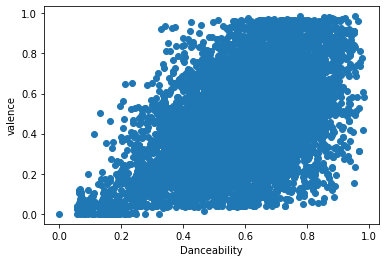

In [24]:
plt.scatter(machine_learning_df.danceability, machine_learning_df.valence)
plt.xlabel('Danceability')
plt.ylabel('Valence')
plt.show()

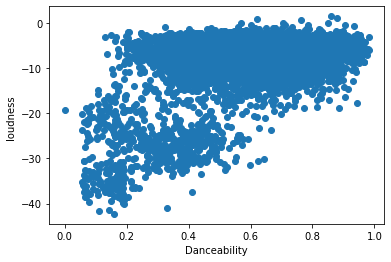

In [25]:
plt.scatter(machine_learning_df.danceability, machine_learning_df.loudness)
plt.xlabel('Danceability')
plt.ylabel('Loudness  ')
plt.show()

In [26]:
ml_matrix['speechiness'].sort_values(ascending=False)

speechiness         1.000000
danceability        0.203185
loudness            0.148785
energy              0.126200
popularity          0.112220
tempo               0.092286
valence             0.076584
time_signature      0.057133
liveness            0.049801
key                 0.004353
mode               -0.056862
acousticness       -0.119189
duration_ms        -0.129864
instrumentalness   -0.166455
Name: speechiness, dtype: float64

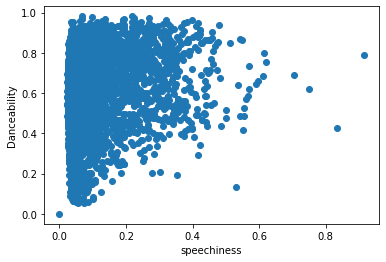

In [28]:
plt.scatter(machine_learning_df.speechiness, machine_learning_df.danceability)
plt.xlabel('Speechiness')
plt.ylabel('Danceability')
plt.show()

In [29]:
ml_matrix['loudness'].sort_values(ascending=False)

loudness            1.000000
energy              0.748106
danceability        0.456172
valence             0.395941
time_signature      0.260138
tempo               0.206280
speechiness         0.148785
popularity          0.106112
duration_ms         0.060396
liveness            0.054523
key                 0.044263
mode               -0.060172
instrumentalness   -0.620092
acousticness       -0.676595
Name: loudness, dtype: float64

In [30]:
ml_matrix['energy'].sort_values(ascending=False)

energy              1.000000
loudness            0.748106
valence             0.334780
liveness            0.258017
tempo               0.209989
time_signature      0.208064
danceability        0.192690
speechiness         0.126200
popularity          0.078087
duration_ms         0.054350
key                 0.054164
mode               -0.073767
instrumentalness   -0.349642
acousticness       -0.781359
Name: energy, dtype: float64

In [31]:
ml_matrix['valence'].sort_values(ascending=False)

valence             1.000000
danceability        0.526934
loudness            0.395941
energy              0.334780
time_signature      0.159419
speechiness         0.076584
tempo               0.073243
popularity          0.055255
key                 0.047860
mode               -0.049314
liveness           -0.056720
duration_ms        -0.090746
instrumentalness   -0.260612
acousticness       -0.276502
Name: valence, dtype: float64

array([[<AxesSubplot:xlabel='danceability', ylabel='danceability'>,
        <AxesSubplot:xlabel='energy', ylabel='danceability'>,
        <AxesSubplot:xlabel='loudness', ylabel='danceability'>,
        <AxesSubplot:xlabel='valence', ylabel='danceability'>,
        <AxesSubplot:xlabel='speechiness', ylabel='danceability'>,
        <AxesSubplot:xlabel='tempo', ylabel='danceability'>,
        <AxesSubplot:xlabel='time_signature', ylabel='danceability'>],
       [<AxesSubplot:xlabel='danceability', ylabel='energy'>,
        <AxesSubplot:xlabel='energy', ylabel='energy'>,
        <AxesSubplot:xlabel='loudness', ylabel='energy'>,
        <AxesSubplot:xlabel='valence', ylabel='energy'>,
        <AxesSubplot:xlabel='speechiness', ylabel='energy'>,
        <AxesSubplot:xlabel='tempo', ylabel='energy'>,
        <AxesSubplot:xlabel='time_signature', ylabel='energy'>],
       [<AxesSubplot:xlabel='danceability', ylabel='loudness'>,
        <AxesSubplot:xlabel='energy', ylabel='loudness'>,
        

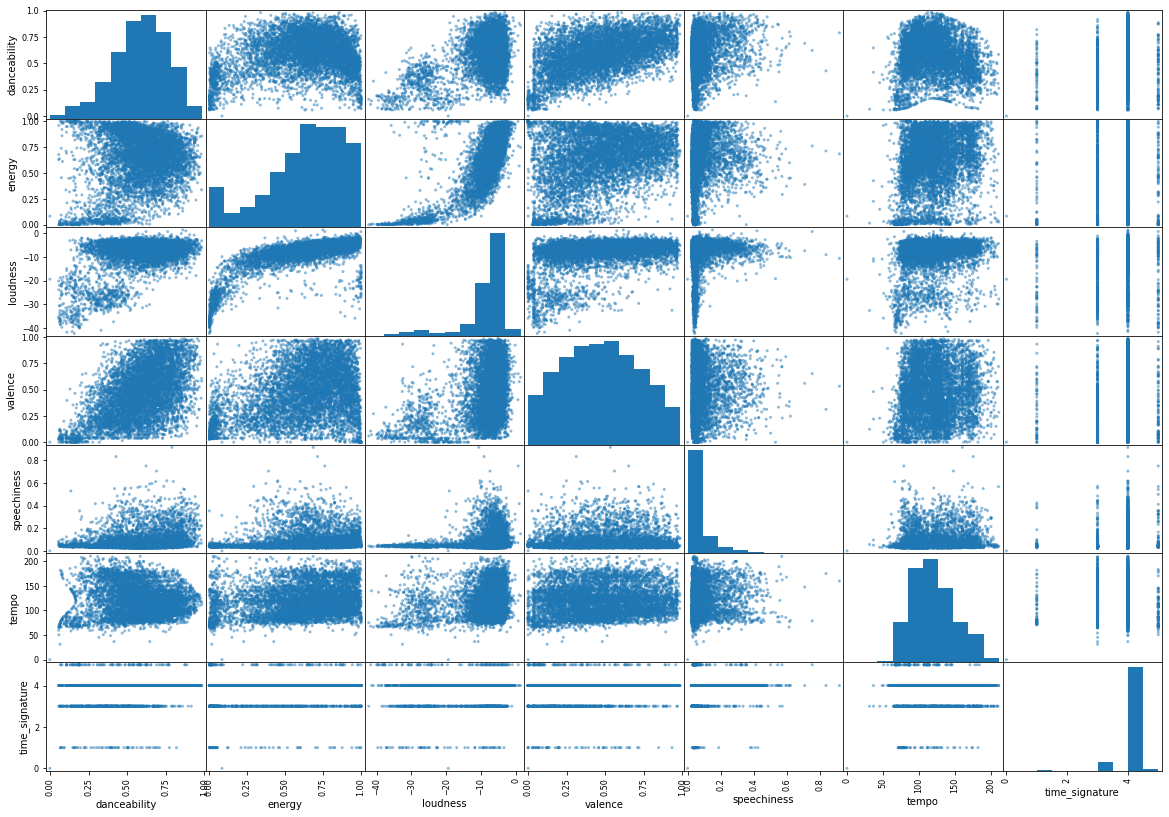

In [34]:
attributes = ['danceability', 'energy', 'loudness', 'valence', 'speechiness', 'tempo', 'time_signature']

pd.plotting.scatter_matrix(machine_learning_df[attributes], figsize=(20,14))

## convert popularity to a binary classifier
greater than or equal to the 75% percentile (66) = 1
less than 66 = 0

([<matplotlib.axis.XTick at 0x238f6d190c8>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

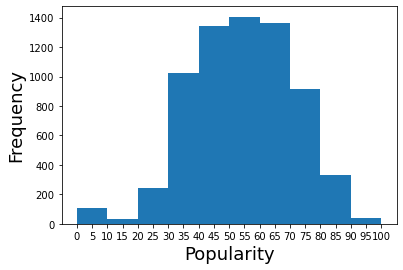

In [21]:
ticks = [0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100]

plt.hist(machine_learning_df['popularity'])
plt.xlabel("Popularity", fontsize=18)
plt.ylabel("Frequency", fontsize=18)
plt.xticks(ticks)

In [35]:
machine_learning_df['popularity'].describe()

count    6803.000000
mean       53.722769
std        16.877358
min         0.000000
25%        41.000000
50%        54.000000
75%        66.000000
max       100.000000
Name: popularity, dtype: float64

In [36]:
machine_learning_df['popular'] = np.where(machine_learning_df['popularity']>=66, 1, 0)

In [128]:
# slice to see if it worked
machine_learning_df[1700:1900]

danceability   energy  key  loudness  mode  speechiness  acousticness  \
1700         0.709  0.81900   11    -6.047     0       0.1310      0.632000   
1701         0.711  0.77800    2    -6.346     1       0.0897      0.027300   
1702         0.724  0.60300   10    -6.261     0       0.0317      0.183000   
1703         0.727  0.90400   10    -3.408     0       0.0640      0.015300   
1704         0.728  0.95000   11    -4.216     0       0.0977      0.005500   
...            ...      ...  ...       ...   ...          ...           ...   
1895         0.164  1.00000    9   -13.631     1       0.0867      0.213000   
1896         0.167  0.85800    5   -20.461     1       0.1070      0.000247   
1897         0.171  0.00176    2   -34.599     1       0.0444      0.982000   
1898         0.173  0.02560    5   -33.216     1       0.0428      0.966000   
1899         0.184  0.99900    7   -18.393     0       0.0477      0.146000   

      instrumentalness  liveness  valence    tempo  duration_ms  \
1700          0.736000    0.1700  0.65600  125.290       146030   
1701          0.000002    0.1030  0.82700  160.018       108984   
1702          0.000469    0.0948  0.56900  111.493       240880   
1703          0.550000    0.0963  0.37200  124.020       128500   
1704          0.003860    0.3300  0.81200  124.003       224516   
...                ...       ...      ...      ...          ...   
1895          0.490000    0.9470  0.00001  126.844       226000   
1896          0.932000    0.5270  0.01300  118.765       208000   
1897          0.907000    0.1070  0.10100   67.530       171000   
1898          0.603000    0.1120  0.05110   72.003       221000   
1899          0.988000    0.9550  0.00001  109.023       141920   

      time_signature  popularity  popular  
1700               4          66        1  
1701               4          66        1  
1702               4          66        1  
1703               4          66        1  
1704               4          66        1  
...              ...         ...      ...  
1895               4          64        0  
1896               4          64        0  
1897               3          64        0  
1898               1          64        0  
1899               3          64        0  

[200 rows x 15 columns]

In [53]:
# for binary classfier
X = machine_learning_df.drop(columns=['popularity','popular','liveness','key','mode', 'duration_ms', 'acousticness', 'instrumentalness'])
y = machine_learning_df['popularity']

In [69]:
# X = machine_learning_df.drop(columns=['popularity','time_signature','liveness','key','tempo','mode', 'duration_ms', 'acousticness', 'instrumentalness'])
# y = machine_learning_df['popularity']

In [119]:
# X = machine_learning_df.drop(columns=['popularity'])
# y = machine_learning_df['popularity']

In [55]:
# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [56]:
# just looking at the shape of split data
print(f'X train:{X_train.shape}')
print(f'X test:{X_test.shape}')
print(f'y train:{y_train.shape}')
print(f'y test:{y_test.shape}')

X train:(5102, 7)
X test:(1701, 7)
y train:(5102,)
y test:(1701,)


## LinearRegression

In [57]:
#Linear Regression
lin_reg = LinearRegression()

In [58]:
lin_reg.fit(X_train, y_train)

LinearRegression()

In [65]:
predictions = lin_reg.predict(X_test)

prediction_df = pd.DataFrame({"Prediction": predictions, "Actual": y_test, "Error": predictions - y_test})
prediction_df.head(25)

Prediction  Actual      Error
2576   60.898405      54   6.898405
4012   49.207289      59  -9.792711
2399   54.871454      37  17.871454
2534   50.738937      77 -26.261063
2629   53.168528      53   0.168528
2596   52.063896      58  -5.936104
1606   54.573088      50   4.573088
6003   52.355733      52   0.355733
544    56.912753      78 -21.087247
2589   47.912406      49  -1.087594
5480   53.787415      83 -29.212585
1557   55.691411      55   0.691411
1425   54.134215      52   2.134215
230    54.310490      75 -20.689510
611    48.708160      50  -1.291840
6037   53.048476      50   3.048476
6088   54.322179      51   3.322179
5920   51.054777      61  -9.945223
547    52.440167      72 -19.559833
1323   50.352778      31  19.352778
2124   54.717737      62  -7.282263
1747   56.145145      37  19.145145
3774   56.381930      45  11.381930
2182   53.582613      75 -21.417387
511    49.949547      63 -13.050453

In [66]:
prediction_df["Error"].describe()

count    1701.000000
mean       -0.814555
std        16.568200
min       -46.304992
25%       -13.484707
50%        -1.017802
75%        11.389628
max        58.500419
Name: Error, dtype: float64

In [67]:
lin_reg.score(X_test, y_test)

0.03796364315548462

## MLPRegressor

In [72]:
#regr = MLPRegressor(random_state=42, max_iter=500, hidden_layer_sizes=(21,14,)).fit(X_train, y_train)

In [76]:
regr = MLPRegressor(random_state=42, max_iter=500).fit(X_train, y_train)

In [78]:
predictions = regr.predict(X_test).astype(int)

prediction_df = pd.DataFrame({"Prediction": predictions, "Actual": y_test, "Error": predictions - y_test})
prediction_df.head(25)

Prediction  Actual  Error
2576          63      54      9
4012          53      59     -6
2399          57      37     20
2534          44      77    -33
2629          51      53     -2
2596          47      58    -11
1606          52      50      2
6003          50      52     -2
544           56      78    -22
2589          57      49      8
5480          59      83    -24
1557          54      55     -1
1425          57      52      5
230           56      75    -19
611           47      50     -3
6037          51      50      1
6088          50      51     -1
5920          47      61    -14
547           52      72    -20
1323          44      31     13
2124          54      62     -8
1747          55      37     18
3774          56      45     11
2182          58      75    -17
511           52      63    -11

In [79]:
prediction_df["Error"].describe()

count    1701.000000
mean       -0.545561
std        16.050467
min       -52.000000
25%       -12.000000
50%        -1.000000
75%        10.000000
max        60.000000
Name: Error, dtype: float64

In [80]:
regr.score(X_test, y_test)

0.10027611737631958

## LASSO

In [82]:
from sklearn import linear_model
lasso = linear_model.Lasso(alpha=0.1).fit(X_train, y_train)

In [83]:
predictions = lasso.predict(X_test).astype(int)

prediction_df = pd.DataFrame({"Prediction": predictions, "Actual": y_test, "Error": predictions - y_test})
prediction_df.head(25)

Prediction  Actual  Error
2576          56      54      2
4012          48      59    -11
2399          55      37     18
2534          51      77    -26
2629          52      53     -1
2596          53      58     -5
1606          54      50      4
6003          53      52      1
544           55      78    -23
2589          47      49     -2
5480          54      83    -29
1557          55      55      0
1425          53      52      1
230           54      75    -21
611           49      50     -1
6037          53      50      3
6088          53      51      2
5920          52      61     -9
547           53      72    -19
1323          52      31     21
2124          53      62     -9
1747          53      37     16
3774          55      45     10
2182          55      75    -20
511           52      63    -11

In [84]:
prediction_df["Error"].describe()

count    1701.000000
mean       -1.278660
std        16.659883
min       -46.000000
25%       -14.000000
50%        -2.000000
75%        11.000000
max        55.000000
Name: Error, dtype: float64

In [85]:
lasso.score(X_test, y_test)

0.028109986809841336

## Ridge Regression

In [86]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0).fit(X_train, y_train)

In [87]:
predictions = ridge.predict(X_test).astype(int)

prediction_df = pd.DataFrame({"Prediction": predictions, "Actual": y_test, "Error": predictions - y_test})
prediction_df.head(25)

Prediction  Actual  Error
2576          60      54      6
4012          49      59    -10
2399          54      37     17
2534          50      77    -27
2629          53      53      0
2596          52      58     -6
1606          54      50      4
6003          52      52      0
544           56      78    -22
2589          47      49     -2
5480          53      83    -30
1557          55      55      0
1425          54      52      2
230           54      75    -21
611           48      50     -2
6037          53      50      3
6088          54      51      3
5920          51      61    -10
547           52      72    -20
1323          50      31     19
2124          54      62     -8
1747          56      37     19
3774          56      45     11
2182          53      75    -22
511           49      63    -14

In [88]:
prediction_df["Error"].describe()

count    1701.00000
mean       -1.31746
std        16.57870
min       -47.00000
25%       -14.00000
50%        -2.00000
75%        11.00000
max        58.00000
Name: Error, dtype: float64

In [89]:
ridge.score(X_test, y_test)

0.037835586113065256

## Nearest Neighbors

In [90]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=2).fit(X_train, y_train)

In [91]:
predictions = knn.predict(X_test).astype(int)

prediction_df = pd.DataFrame({"Prediction": predictions, "Actual": y_test, "Error": predictions - y_test})
prediction_df.head(25)

Prediction  Actual  Error
2576          54      54      0
4012          51      59     -8
2399          62      37     25
2534          56      77    -21
2629          48      53     -5
2596          51      58     -7
1606          48      50     -2
6003          40      52    -12
544           53      78    -25
2589          59      49     10
5480          53      83    -30
1557          36      55    -19
1425          72      52     20
230           49      75    -26
611           42      50     -8
6037          80      50     30
6088          42      51     -9
5920          38      61    -23
547           29      72    -43
1323          47      31     16
2124          60      62     -2
1747          44      37      7
3774          58      45     13
2182          51      75    -24
511           31      63    -32

In [92]:
prediction_df["Error"].describe()

count    1701.000000
mean       -0.537919
std        19.336324
min       -54.000000
25%       -14.000000
50%        -1.000000
75%        12.000000
max        78.000000
Name: Error, dtype: float64

In [93]:
knn.score(X_test, y_test)

-0.30826192965522536

## SGDClassifier

In [16]:
sgd_classifier = SGDClassifier(random_state=42)  

In [31]:
sgd_classifier.fit(X_train, y_train)

SGDClassifier(random_state=42)

In [33]:
predictions = sgd_classifier.predict(X_test)

pd.DataFrame({"Prediction": predictions, "Actual": y_test})

Prediction  Actual
4574           0       0
3175           0       1
5353           0       0
1897           0       0
2813           0       0
...          ...     ...
461            0       0
1142           0       0
3292           0       1
3897           0       0
5608           0       0

[1701 rows x 2 columns]

In [35]:
matrix = confusion_matrix(y_test, predictions)
print(matrix)

[[1259    7]
 [ 427    8]]


In [43]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='YlGn',
                          title=None):
    
    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

In [46]:
group_names = ['True Neg','False Pos','False Neg','True Pos']

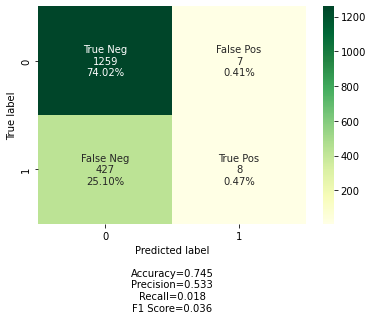

In [47]:
make_confusion_matrix(matrix, group_names)

In [54]:
sgd_report = classification_report(y_test, predictions)

print(sgd_report)

              precision    recall  f1-score   support

           0       0.75      0.99      0.85      1266
           1       0.47      0.02      0.03       435

    accuracy                           0.74      1701
   macro avg       0.61      0.50      0.44      1701
weighted avg       0.67      0.74      0.64      1701



## LogisticRegression

In [48]:
# Logistic Regression
classifier = LogisticRegression(solver='liblinear', random_state=42)

classifier

LogisticRegression(random_state=42, solver='liblinear')

In [49]:
classifier.fit(X_train, y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [50]:
predictions = classifier.predict(X_test)

pd.DataFrame({"Prediction": predictions, "Actual": y_test})

Prediction  Actual
4574           0       0
3175           0       1
5353           0       0
1897           0       0
2813           0       0
...          ...     ...
461            0       0
1142           0       0
3292           0       1
3897           0       0
5608           0       0

[1701 rows x 2 columns]

In [51]:
accuracy_score(y_test, predictions)

0.7436801881246325

In [52]:
matrix = confusion_matrix(y_test, predictions)
print(matrix)

[[1258    8]
 [ 428    7]]


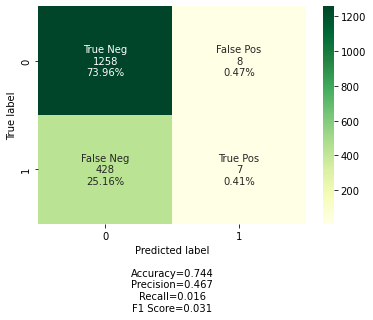

In [56]:
make_confusion_matrix(matrix, group_names)

In [55]:
log_reg_report = classification_report(y_test, predictions)

print(log_reg_report)

              precision    recall  f1-score   support

           0       0.75      0.99      0.85      1266
           1       0.47      0.02      0.03       435

    accuracy                           0.74      1701
   macro avg       0.61      0.50      0.44      1701
weighted avg       0.67      0.74      0.64      1701



In [27]:
# for binary classfier
X_playlist_test = playlist_df.drop(columns=['popularity', 'time_signature','liveness','key','tempo','mode', 'duration_ms', 'acousticness', 'instrumentalness'])
# y = playlist_learning_df['popular']

In [29]:
predictions = classifier.predict(X_playlist_test)

playlist_df['predictions'] = pd.DataFrame({"Prediction": predictions})

In [33]:
playlist_df['popular'] = np.where(playlist_df['popularity']>=66, 1, 0)

In [35]:
popular = playlist_df['popular']

In [36]:
accuracy_score(popular, predictions)

0.8727445394112061

In [37]:
playlist_df

danceability  energy  key  loudness  mode  speechiness  acousticness  \
0           0.2360   0.892    2    -4.106     0       0.1880      0.030500   
1           0.3640   0.912    7    -2.968     1       0.1070      0.000104   
2           0.1820   0.979    5    -3.598     1       0.4450      0.000116   
3           0.2490   0.660    0    -6.905     1       0.0342      0.504000   
4           0.5850   0.832    6    -3.791     1       0.0394      0.281000   
...            ...     ...  ...       ...   ...          ...           ...   
1048        0.0967   0.817   10    -6.313     1       0.0493      0.000012   
1049        0.5980   0.750    0    -6.760     1       0.0433      0.005990   
1050        0.5450   0.717    3    -6.869     1       0.0360      0.004170   
1051        0.3580   0.938    0    -5.577     1       0.0483      0.003750   
1052        0.5060   0.948   10    -5.626     1       0.1050      0.727000   

      instrumentalness  liveness  valence    tempo  duration_ms  \
0             0.000000    0.2780   0.0685  184.981       279227   
1             0.002500    0.0860   0.6660  105.368       189200   
2             0.041100    0.1630   0.0843  150.174       314000   
3             0.002600    0.0891   0.4350  149.813       248947   
4             0.000322    0.0822   0.5440  147.978       187387   
...                ...       ...      ...      ...          ...   
1048          0.450000    0.1390   0.4250   72.927       345400   
1049          0.000789    0.1170   0.8330  132.418       265400   
1050          0.406000    0.1360   0.5890  118.515       239621   
1051          0.000009    0.1170   0.9440  182.836       288339   
1052          0.000000    0.0904   0.9340  130.195       160400   

      time_signature  popularity  predictions  popular  
0                  4          62            0        0  
1                  4          58            0        0  
2                  4          34            0        0  
3                  4          68            0        1  
4                  4          39            0        0  
...              ...         ...          ...      ...  
1048               3          23            0        0  
1049               4          46            0        0  
1050               4          52            0        0  
1051               4          68            0        1  
1052               4          56            0        0  

[1053 rows x 16 columns]

In [39]:
compare = playlist_df[playlist_df['popular'] == playlist_df['predictions']]

In [40]:
compare

danceability  energy  key  loudness  mode  speechiness  acousticness  \
0           0.2360   0.892    2    -4.106     0       0.1880      0.030500   
1           0.3640   0.912    7    -2.968     1       0.1070      0.000104   
2           0.1820   0.979    5    -3.598     1       0.4450      0.000116   
4           0.5850   0.832    6    -3.791     1       0.0394      0.281000   
5           0.8330   0.716    9   -11.265     1       0.0400      0.533000   
...            ...     ...  ...       ...   ...          ...           ...   
1047        0.5630   0.923    9    -3.162     1       0.0590      0.000738   
1048        0.0967   0.817   10    -6.313     1       0.0493      0.000012   
1049        0.5980   0.750    0    -6.760     1       0.0433      0.005990   
1050        0.5450   0.717    3    -6.869     1       0.0360      0.004170   
1052        0.5060   0.948   10    -5.626     1       0.1050      0.727000   

      instrumentalness  liveness  valence    tempo  duration_ms  \
0             0.000000    0.2780   0.0685  184.981       279227   
1             0.002500    0.0860   0.6660  105.368       189200   
2             0.041100    0.1630   0.0843  150.174       314000   
4             0.000322    0.0822   0.5440  147.978       187387   
5             0.000000    0.0580   0.9000  104.800       186627   
...                ...       ...      ...      ...          ...   
1047          0.000000    0.0885   0.1400  118.070       227797   
1048          0.450000    0.1390   0.4250   72.927       345400   
1049          0.000789    0.1170   0.8330  132.418       265400   
1050          0.406000    0.1360   0.5890  118.515       239621   
1052          0.000000    0.0904   0.9340  130.195       160400   

      time_signature  popularity  predictions  popular  
0                  4          62            0        0  
1                  4          58            0        0  
2                  4          34            0        0  
4                  4          39            0        0  
5                  4          51            0        0  
...              ...         ...          ...      ...  
1047               4          43            0        0  
1048               3          23            0        0  
1049               4          46            0        0  
1050               4          52            0        0  
1052               4          56            0        0  

[919 rows x 16 columns]

In [121]:
matrix = confusion_matrix(y_test, predictions)
print(matrix)

[[1441    5]
 [ 505   13]]


In [124]:
report = classification_report(y_test, predictions)

print(report)

              precision    recall  f1-score   support

           0       0.74      1.00      0.85      1446
           1       0.72      0.03      0.05       518

    accuracy                           0.74      1964
   macro avg       0.73      0.51      0.45      1964
weighted avg       0.74      0.74      0.64      1964



### SVM

In [80]:
from sklearn.svm import SVC
support = SVC(kernel='linear')

In [81]:
support.fit(X_train, y_train)

SVC(kernel='linear')

In [82]:
y_pred = support.predict(X_test)
results = pd.DataFrame({
   "Prediction": y_pred,
   "Actual": y_test
}).reset_index(drop=True)
results.head()

Prediction  Actual
0           0       0
1           0       0
2           0       0
3           0       0
4           0       1

In [83]:
accuracy_score(y_test, y_pred)

0.7275967413441955

In [84]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.98      0.84      1446
           1       0.23      0.01      0.03       518

    accuracy                           0.73      1964
   macro avg       0.48      0.50      0.43      1964
weighted avg       0.60      0.73      0.63      1964



## Nonlinear SVM Classification

In [61]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.svm import LinearSVC

In [62]:
polynomial_svm_clf = Pipeline([
    ("poly_features", PolynomialFeatures(degree=3)),
    ("scaler", StandardScaler()),
    ("svm_clf", LinearSVC(C=10, loss="hinge"))
])

polynomial_svm_clf.fit(X_train, y_train)

C:\Anaconda\envs\mlenv\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge'))])

In [63]:
predictions = polynomial_svm_clf.predict(X_test)

pd.DataFrame({"Prediction": predictions, "Actual": y_test})

Prediction  Actual
4574           0       0
3175           0       1
5353           0       0
1897           0       0
2813           0       0
...          ...     ...
461            0       0
1142           0       0
3292           0       1
3897           0       0
5608           0       0

[1701 rows x 2 columns]

In [64]:
matrix = confusion_matrix(y_test, predictions)
print(matrix)

[[1212   54]
 [ 396   39]]


In [65]:
polynomial_svm_report = classification_report(y_test, predictions)

print(polynomial_svm_report)

              precision    recall  f1-score   support

           0       0.75      0.96      0.84      1266
           1       0.42      0.09      0.15       435

    accuracy                           0.74      1701
   macro avg       0.59      0.52      0.50      1701
weighted avg       0.67      0.74      0.67      1701



## SVM Regression

In [72]:
from sklearn.svm import SVR

svm_poly_reg = SVR(kernel="poly", degree=2, C=100, epsilon=0.1)
svm_poly_reg.fit(X_train, y_train)

SVR(C=100, degree=2, kernel='poly')

In [78]:
predictions = svm_poly_reg.predict(X_test)

prediction_df = pd.DataFrame({"Prediction": predictions, "Actual": y_test, "Error": round(predictions - y_test)})

In [82]:
prediction_df["Error"].describe()

count    1701.000000
mean       -0.201646
std        16.591384
min       -45.000000
25%       -12.000000
50%        -1.000000
75%        11.000000
max        57.000000
Name: Error, dtype: float64

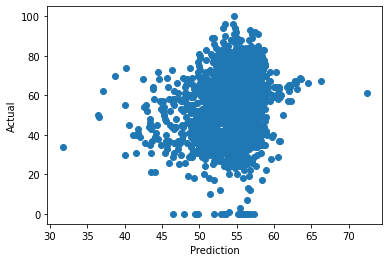

In [84]:
plt.scatter(prediction_df.Prediction, prediction_df.Actual)
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.show()

## Polynomial Regression

In [89]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)

X_poly = poly_features.fit_transform(X_train)

In [90]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y_train)

LinearRegression()

In [98]:
y_pred = model.predict(X_test)

In [103]:
prediction_df = pd.DataFrame({"Prediction": y_pred, "Actual": y_test, "Error": round(y_pred - y_test)})

In [104]:
prediction_df["Error"].describe()

count    1701.000000
mean       -7.131099
std        40.046398
min       -85.000000
25%       -41.000000
50%       -20.000000
75%        27.000000
max        99.000000
Name: Error, dtype: float64

## DecisionTreeRegressor

In [105]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=2)
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2)

In [109]:
predictions = tree_reg.predict(X_test)

In [110]:
prediction_df = pd.DataFrame({"Prediction": predictions, "Actual": y_test, "Error": round(predictions - y_test)})

In [111]:
prediction_df["Error"].describe()

count    1701.000000
mean       -0.347443
std        16.318623
min       -46.000000
25%       -12.000000
50%        -2.000000
75%        11.000000
max        62.000000
Name: Error, dtype: float64

## PCA

In [125]:
from sklearn.decomposition import PCA

pca = PCA(n_components=6)
X_reduced = pca.fit_transform(X_train)

In [127]:
pca_df = pd.DataFrame(data=X_reduced, columns=["PC 1","PC 2","PC 3","PC 4","PC 5","PC 6"])

pca_df.head()

PC 1       PC 2      PC 3      PC 4      PC 5      PC 6
0   72739.706827  36.308593 -3.684791  4.650679 -0.515952 -0.966107
1  -14975.292895 -26.667434 -1.030486 -5.406533 -0.244142 -0.076545
2 -104695.293117  26.279292 -6.933098  0.563636  0.580604  0.036811
3  -35336.292980  -5.019727 -4.916709 -0.446244  0.620328  0.000841
4   12285.706916  17.261387 -4.026053 -5.399270 -0.273900 -0.029971

In [128]:
pca.explained_variance_ratio_

array([9.99999849e-01, 1.42032580e-07, 6.81822191e-09, 2.02545802e-09,
       3.59419395e-11, 2.32482785e-11])

In [129]:
from sklearn.cluster import KMeans
import hvplot.pandas

# Find the best value for K
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of K values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(pca_df)
    inertia.append(km.inertia_)

# Create the elbow curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.hvplot.line(x="k", y="inertia", xticks=k, title="Elbow Curve")

:Curve   [k]   (inertia)

In [130]:
# Initialize the K-means model
model = KMeans(n_clusters=3, random_state=42)

# Fit the model
model.fit(pca_df)

# Predict clusters
predictions = model.predict(pca_df)

# Add the predicted class columns
pca_df["class"] = model.labels_
pca_df.head()

PC 1       PC 2      PC 3      PC 4      PC 5      PC 6  class
0   72739.706827  36.308593 -3.684791  4.650679 -0.515952 -0.966107      1
1  -14975.292895 -26.667434 -1.030486 -5.406533 -0.244142 -0.076545      0
2 -104695.293117  26.279292 -6.933098  0.563636  0.580604  0.036811      0
3  -35336.292980  -5.019727 -4.916709 -0.446244  0.620328  0.000841      0
4   12285.706916  17.261387 -4.026053 -5.399270 -0.273900 -0.029971      1

In [132]:
pca_df.hvplot.scatter(
    x="PC 1",
    y="PC 2",
    hover_cols=["class"],
    by="class",
)

:NdOverlay   [class]
   :Scatter   [PC 1]   (PC 2,class)

### random over/under sampling

In [85]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

In [86]:
model = LogisticRegression(solver='lbfgs', random_state=1)
model.fit(X_resampled, y_resampled)

C:\Anaconda\envs\mlenv\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(random_state=1)

In [87]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [88]:
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(y_test, y_pred)

0.5

In [88]:
from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.00      0.00      1.00      0.00      0.00      0.00        20
          1       0.00      0.00      0.98      0.00      0.00      0.00         1
          2       0.00      0.00      0.99      0.00      0.00      0.00         0
          3       0.00      0.00      0.99      0.00      0.00      0.00         1
          4       0.00      0.00      0.98      0.00      0.00      0.00         0
          5       0.00      0.00      0.99      0.00      0.00      0.00         0
          7       0.00      0.00      0.99      0.00      0.00      0.00         1
          9       0.00      0.00      0.97      0.00      0.00      0.00         0
         10       0.00      0.00      0.96      0.00      0.00      0.00         1
         11       0.00      0.00      0.99      0.00      0.00      0.00         0
         12       0.00      0.00      0.96      0.00      0.00      0.00         2
   

C:\Anaconda\envs\mlenv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Anaconda\envs\mlenv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Anaconda\envs\mlenv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Sensitivity is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### SMOTE

In [90]:
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE(random_state=1,
sampling_strategy='auto').fit_resample(
   X_train, y_train)

In [91]:
model = LogisticRegression(solver='lbfgs', random_state=1)
model.fit(X_resampled, y_resampled)

y_pred = model.predict(X_test)
balanced_accuracy_score(y_test, y_pred)

confusion_matrix(y_test, y_pred)

print(classification_report_imbalanced(y_test, y_pred))


                   pre       rec       spe        f1       geo       iba       sup

          0       0.74      1.00      0.00      0.85      0.00      0.00      1446
          1       0.00      0.00      1.00      0.00      0.00      0.00       518

avg / total       0.54      0.74      0.26      0.62      0.00      0.00      1964



C:\Anaconda\envs\mlenv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### undersampling

In [92]:
from imblearn.under_sampling import RandomUnderSampler
ros = RandomUnderSampler(random_state=1)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

In [93]:
model = LogisticRegression(solver='lbfgs', random_state=1)
model.fit(X_resampled, y_resampled)

LogisticRegression(random_state=1)

In [94]:
y_pred = model.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[1446,    0],
       [ 518,    0]], dtype=int64)

In [95]:
balanced_accuracy_score(y_test, y_pred)

0.5

In [96]:
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.74      1.00      0.00      0.85      0.00      0.00      1446
          1       0.00      0.00      1.00      0.00      0.00      0.00       518

avg / total       0.54      0.74      0.26      0.62      0.00      0.00      1964



C:\Anaconda\envs\mlenv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### cluster centroids

In [97]:
from imblearn.under_sampling import ClusterCentroids
cc = ClusterCentroids(random_state=1)
X_resampled, y_resampled = cc.fit_resample(X_train, y_train)

In [98]:
model = LogisticRegression(solver='lbfgs', random_state=1)
model.fit(X_resampled, y_resampled)

LogisticRegression(random_state=1)

In [99]:
y_pred = model.predict(X_test)
confusion_matrix(y_test, y_pred)

balanced_accuracy_score(y_test, y_pred)

print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.74      1.00      0.00      0.85      0.00      0.00      1446
          1       0.00      0.00      1.00      0.00      0.00      0.00       518

avg / total       0.54      0.74      0.26      0.62      0.00      0.00      1964



C:\Anaconda\envs\mlenv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### SMOTEENN

In [100]:
from imblearn.combine import SMOTEENN
smote_enn = SMOTEENN(random_state=0)
X_resampled, y_resampled = smote_enn.fit_resample(X, y)

In [101]:
model = LogisticRegression(solver='lbfgs', random_state=1)
model.fit(X_resampled, y_resampled)

LogisticRegression(random_state=1)

In [102]:
y_pred = model.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[1446,    0],
       [ 518,    0]], dtype=int64)

In [103]:
balanced_accuracy_score(y_test, y_pred)

0.5

In [104]:
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.74      1.00      0.00      0.85      0.00      0.00      1446
          1       0.00      0.00      1.00      0.00      0.00      0.00       518

avg / total       0.54      0.74      0.26      0.62      0.00      0.00      1964



C:\Anaconda\envs\mlenv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## scaling

In [64]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [125]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [126]:
X_scaler = scaler.fit_transform(X_train)

In [ ]:
type(X_scaler)

In [ ]:
X_scaler

In [ ]:
X_scaler.shape

In [ ]:
X_train.shape

In [ ]:
X_test.shape

In [ ]:
y_test.shape

### random forest

In [129]:
from sklearn.ensemble import RandomForestClassifier

In [127]:
# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [130]:
# Create a random forest classifier.
rf_model = RandomForestClassifier(n_estimators=128, random_state=42)

# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = rf_model.predict(X_test_scaled)
print(f" Random forest predictive accuracy: {accuracy_score(y_test,y_pred):.3f}")

 Random forest predictive accuracy: 0.757


### deep learning

In [131]:
import tensorflow as tf

# Define the model - deep neural net
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 24
hidden_nodes_layer2 = 12

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))


# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the Sequential model together and customize metrics
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=50)

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/50
185/185 [==============================] - 1s 2ms/step - loss: 0.6318 - accuracy: 0.6801
Epoch 2/50
185/185 [==============================] - 0s 2ms/step - loss: 0.5793 - accuracy: 0.7446
Epoch 3/50
185/185 [==============================] - 0s 1ms/step - loss: 0.5731 - accuracy: 0.7446
Epoch 4/50
185/185 [==============================] - 0s 2ms/step - loss: 0.5660 - accuracy: 0.7446
Epoch 5/50
185/185 [==============================] - 0s 1ms/step - loss: 0.5577 - accuracy: 0.7446
Epoch 6/50
185/185 [==============================] - 0s 1ms/step - loss: 0.5481 - accuracy: 0.7446
Epoch 7/50
185/185 [==============================] - 0s 1ms/step - loss: 0.5428 - accuracy: 0.7446
Epoch 8/50
185/185 [==============================] - 0s 2ms/step - loss: 0.5390 - accuracy: 0.7446
Epoch 9/50
185/185 [==============================] - 0s 2ms/step - loss: 0.5371 - accuracy: 0.7446
Epoch 10/50
185/185 [==============================] - 0s 2ms/step - loss: 0.5368 - accuracy: 0.7449

In [110]:
full_ml_df.describe()

danceability       energy          key     loudness         mode  \
count   7856.000000  7856.000000  7856.000000  7856.000000  7856.000000   
mean       0.570757     0.636936     5.298498    -8.728758     0.640911   
std        0.180993     0.259071     3.566358     6.557371     0.479764   
min        0.000000     0.001050     0.000000   -42.291000     0.000000   
25%        0.453000     0.490000     2.000000    -9.531250     0.000000   
50%        0.583000     0.684000     5.000000    -6.825000     1.000000   
75%        0.705000     0.846000     8.000000    -4.959750     1.000000   
max        0.982000     1.000000    11.000000     1.420000     1.000000   

       speechiness  acousticness  instrumentalness     liveness      valence  \
count  7856.000000   7856.000000       7856.000000  7856.000000  7856.000000   
mean      0.080130      0.272868          0.197523     0.185124     0.468104   
std       0.078945      0.326828          0.340243     0.151095     0.248375   
min       0.000000      0.000001          0.000000     0.014400     0.000000   
25%       0.036700      0.011300          0.000000     0.096700     0.269000   
50%       0.049400      0.114000          0.000393     0.121000     0.462000   
75%       0.085600      0.460000          0.218250     0.230000     0.661000   
max       0.914000      0.996000          1.000000     0.990000     0.985000   

             tempo   duration_ms  time_signature   popularity      popular  
count  7856.000000  7.856000e+03     7856.000000  7856.000000  7856.000000  
mean    120.788084  2.162357e+05        3.915224    53.005601     0.257510  
std      30.063543  7.755379e+04        0.392407    16.786061     0.437291  
min       0.000000  5.018100e+04        0.000000     0.000000     0.000000  
25%      96.889000  1.717718e+05        4.000000    41.000000     0.000000  
50%     119.959500  2.049015e+05        4.000000    53.000000     0.000000  
75%     139.970000  2.436522e+05        4.000000    65.000000     1.000000  
max     214.261000  1.577827e+06        5.000000   100.000000     1.000000